In [15]:
from imaging import ScanboxRollingAverage
nplanes = 4
expname = '181210_JC085_2P_JC'
#name = 'zero_reference_mag_1.0'
#name = '_bottom_plane_mag_1.0'
#name = '_recording_gray_mag_1.0'
# Start the memory mapping
rollavg = ScanboxRollingAverage(nplanes = nplanes)

In [9]:
# Display
rollavg.play()

In [23]:
# Save references
expname = '181210_JC085_2P_JC'
#name = 'zero_reference_mag_1.0'
#name = 'zero_reference_mag_1.4'
# name = '_bottom_plane_mag_1.0'
#name = '_bottom_plane_mag_1.4'
name = '_recording_gray_mag_1.0'
#name = '_recording_gray_mag_1.4'
# name = '_bandpass_mag_1.0'
# name = '_recording_retino_mag_1.0'
# name = '_recording_dark_flashes_1.0'

rollavg.saveReferences(expname = expname ,
                       filename = name,parentfolder='I:/data/references/')

Saved 4 planes - I:/data/references/181210_JC085_2P_JC\ref002_plane004__recording_gray_mag_1.0.tif


In [ ]:
# Load external references
# fname = 'i:/data/references/181106_JC089_2P_JC/ref000_plane001_zero_reference_mag_1.0.tif'
#fname = 'i:/data/references/181106_JC085_2P_JC/ref00_zero_reference_1.0.tif'
fname = 'i:/data/references/181120_JC085_2P_JC/ref002_plane004__recording_gray_mag_1.0.tif'
rollavg.loadReferences(fname)

rollavg.play()

(6, 0.16666666666666666)
(7, 0.14285714285714285)
(8, 0.125)
(9, 0.1111111111111111)
(10, 0.1)
(11, 0.09090909090909091)
(12, 0.08333333333333333)
(13, 0.07692307692307693)
(14, 0.07142857142857142)
(15, 0.06666666666666667)
(16, 0.0625)


In [14]:
# close the memory mapping
rollavg.close()
# delete the rolla object
del rollavg

In [22]:
from imaging import ScanboxRollingAverage

rollavg = ScanboxRollingAverage(nplanes = 1)
rollavg.loadReferences('i:/data/references/181112_JC086_2P_JC/ref002_plane001_zero_reference_mag_1.4.tif')
rollavg.play()

c:\users\bstation6\imagingcode\imaging\registration\registration.py:176: RuntimeWarning: invalid value encountered in divide
  src_freq /= np.sqrt(np.mean(np.abs(src_freq)**2))


0.8
0.64
0.512


In [17]:

showref = False
register = False
equalize  = True
superimpose = False
iPlane = 0
nPlanes = 4
sbxmmap.nPlanes.value = nPlanes
nFrames = 8
alpha_ema = 1./nFrames
references = [None for r in range(sbxmmap.nPlanes.value)]
cv2.startWindowThread()
i = 0
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
scale = 1
while(True):
    # Capture frame-by-frame
    frame = sbxmmap.frame[iPlane]
    if references[iPlane] is None:
        references[iPlane] = frame.copy()
    if register:
        shift,_,_ = dftreg_TranslationShift(
        references[iPlane][200:-200:2,200:-200:1],
            frame[200:-200:2,200:-200:1],
            upsample_factor=2)
        frame = shiftImage(frame,shift)
    references[iPlane]  = ((1.-alpha_ema)*references[iPlane].astype(np.float32) + 
                           (alpha_ema)*frame.astype(np.float32)).astype(np.uint16)
    
    img = cv2.convertScaleAbs(references[iPlane],
                              alpha=(255.0/65535.0))
#     img = cv2.convertScaleAbs(references[iPlane],
#                               alpha=(255.0/np.max(references[iPlane])*0.8))
    
    if equalize:
        img = clahe.apply(img.astype(np.uint8))
    img = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_GRAY2BGR)
        
    if superimpose:
        img[:,:,0] = 0
        img[:,:,2] = 0 # green image
        alpha = 0.5
        #otheri = otherimg.copy().astype(np.float32)
        #otheri = np.abs(otheri - 65535).astype(np.uint16)
        otheri = cv2.convertScaleAbs(otherimg,
                              alpha=(255.0/65535.0))
        if equalize:
            otheri = clahe.apply(otheri.astype(np.uint8))
        #otheri = cv2.cvtColor(otheri.astype(np.uint8), cv2.COLOR_GRAY2BGR)
        img[:,:,2] = otheri[:,:]
        shifto,_,_ = dftreg_TranslationShift(
        references[iPlane][200:-200:2,200:-200:1],
            otherimg[:,:][200:-200:2,200:-200:1],
            upsample_factor=2)
        #otheri[:,:,0] = 0
        # red image
    img = cv2.resize(img,(0,0),fx=scale,
                     fy = scale)
    if showref:
        img[:,:,1] = 0
    img = img.transpose([1,0,2]).astype(np.uint8).copy()
    if superimpose:
        cv2.putText(img,'{0},{1}'.format(shifto[0],shifto[1]), (10,300),
                            cv2.FONT_HERSHEY_SIMPLEX,
                            1, [200,200,200],2)
    if register:
        color = [200,0,0]
        cv2.putText(img,'{0} - {1},{2}'.format(i,shift[0],shift[1]), (10,100),
                            cv2.FONT_HERSHEY_SIMPLEX,
                            1, color,2)
    else:
        color = [200,0,200]
        cv2.putText(img,'{0}'.format(i), (10,100),
                            cv2.FONT_HERSHEY_SIMPLEX,
                            1, color,2)
    
    
    cv2.imshow('frame',img)
    i = sbxmmap.frame_num.value
    k = cv2.waitKey(1)
    if k == ord('q'):  # if no key was pressed, -1 is returned
        break
    elif k == ord('r'):
        register = not register
    elif k == ord('e'):
        equalize = not equalize
    elif k == ord('s'):
        superimpose = not superimpose
    elif k == ord('a'):
        showref = not showref
    elif k == ord('d'):
        scale *= 0.8
        print(scale)
    elif k == ord('u'):
        scale *= 1.2
    elif k == ord('w'):
        references[iPlane] = None
    elif k == ord('o'):
        nFrames -= 1
        nFrames = np.clip(nFrames,1,200)
        alpha_ema = 1./nFrames
        print(nFrames,alpha_ema)
    elif k == ord('p'):
        nFrames += 1
        nFrames = np.clip(nFrames,1,200)
        alpha_ema = 1./nFrames
#         alpha_ema += 0.01
#         alpha_ema = np.clip(alpha_ema,0,1)
        print(nFrames,alpha_ema)
    elif k == ord('+'):
        iPlane += 1
        iPlane = np.clip(iPlane,0,sbxmmap.nPlanes.value - 1)
    elif k == ord('-'):
        iPlane -= 1
        iPlane = np.clip(iPlane,0,sbxmmap.nPlanes.value - 1)
    elif not k == -1:
        print(k)
    #    break
# When everything done, release the capture
cv2.destroyAllWindows()



(9, 0.1111111111111111)
(10, 0.1)
(11, 0.09090909090909091)
(12, 0.08333333333333333)
(13, 0.07692307692307693)
(12, 0.08333333333333333)
(11, 0.09090909090909091)
(10, 0.1)
(9, 0.1111111111111111)
(8, 0.125)
(7, 0.14285714285714285)
(6, 0.16666666666666666)
(5, 0.2)
(4, 0.25)
0.8


In [8]:
iPlane = 0
otherimg = references[iPlane].copy()
mag = 1.0
expname = '181106_JC084_2P_JC'
# filename = 'ref00_zero_reference_{0}.tif'.format(mag)

filename = 'ref01_bottom_plane_{0}.tif'.format(mag)
# filename = 'ref02_during_noise_plane_{0}_mag_{1}.tif'.format(iPlane,mag)
foldername = pjoin('i://data/references/',expname)

if not os.path.isdir(foldername):
    os.makedirs(foldername)
fname = pjoin(foldername,filename)
imsave(fname,otherimg)


In [15]:
expname = '181106_JC084_2P_JC'
foldername = pjoin('i://data/references/',expname)
if not os.path.isdir(foldername):
    os.makedirs(foldername)
    
for iPlane in range(nPlanes):
    otherimg = references[iPlane].copy()
    mag = 1.0
    # filename = 'ref00_zero_reference_{0}.tif'.format(mag)
    #filename = 'ref01_bottom_plane_{0}.tif'.format(mag)
    filename = 'ref02_during_noise_plane_{0}_mag_{1}.tif'.format(iPlane,mag)
    fname = pjoin(foldername,filename)
    imsave(fname,otherimg)
    print('.')

.
.
.
.


<IPython.core.display.Javascript object>


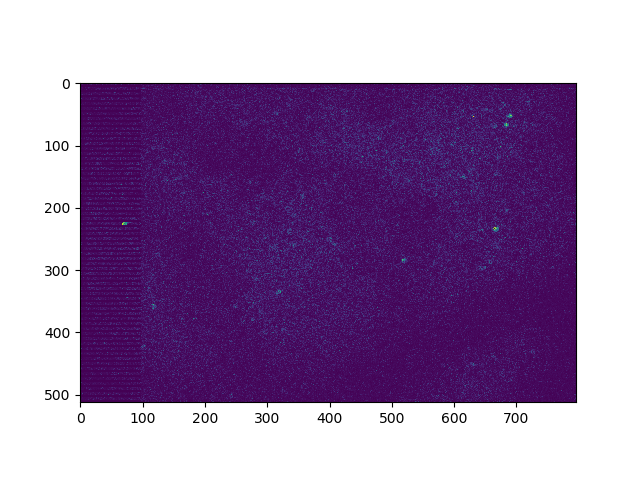

SEJveChjaGlsZHJlbj0oUGxheSh2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J1ByZXNzIHBsYXknLCBpbnRlcnZhbD0zMCwgbWF4PTIwMCksIEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj3igKY=


{'ax': <matplotlib.axes._subplots.AxesSubplot at 0xe6d4ba8>,
 'fig': <matplotlib.figure.Figure at 0xe410b38>,
 'im': <matplotlib.image.AxesImage at 0xea98518>}

In [5]:
from ipywidgets import (interact, interactive, fixed, interact_manual)
from ipywidgets import (Select, Textarea, Button,Dropdown, VBox,
                        HBox, Layout, Label, Text,Play,jslink)
from IPython.display import display
import pylab as plt
from ipywidgets import *
from IPython.display import display
import time

from ipywidgets import Play,jslink,HBox

def nbPlaySbx(sbx,interval=30,**kwargs):
    im = plt.imshow(sbx.frame[0],**kwargs)
    slider = widgets.IntSlider(0,min = 0,max = 200,step = 1,description='Frame')

    play = widgets.Play(interval=interval,
                        value=0,
                        min=0,
                        max=200,
                        step=1,
                        description="Press play",
                        disabled=False)
    jslink((play, 'value'), (slider, 'value'))
    display(HBox([play, slider]))
    
    def updateImage(change):
        im.set_data(sbx.frame[0])
    slider.observe(updateImage, names='value')
    return dict(fig = plt.gcf(),ax=plt.gca(),im= im)
%matplotlib notebook
nbPlaySbx(sbxmmap)

In [2]:
from imaging import ScanboxMmap
sbxmmap = ScanboxMmap()    


Started
